# Imports

In [1]:
from numpy.random import seed
seed(888)
import tensorflow as tf
tf.random.set_seed(404)

2022-12-20 14:09:21.949228: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [55]:
import os
import itertools
import numpy as np
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.callbacks import TensorBoard

from IPython.display import display
from tensorflow.keras.utils import array_to_img

from time import strftime

from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
%matplotlib inline

# Constants

In [48]:
LOG_DIR = 'tensorboard_cifar_logs/'

LABEL_NAMES = ['Plane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
IMAGE_WIDTH = 32
IMAGE_HEIGHT = 32
IMAGE_PIXELS = IMAGE_WIDTH * IMAGE_HEIGHT
COLOR_CHANNELS = 3
TOTAL_INPUTS = IMAGE_PIXELS * COLOR_CHANNELS
NR_CLASSES = 10

VALIDATION_SIZE = 10000
SMALL_TRAIN_SIZE = 1000

# Get the Data

In [4]:
(x_train_all, y_train_all), (x_test, y_test) = cifar10.load_data()

In [5]:
print(type(cifar10))
print(type(x_train_all))

<class 'module'>
<class 'numpy.ndarray'>


# Explore the Data

In [6]:
x_train_all[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

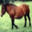

In [7]:
pic = array_to_img(x_train_all[7])
display(pic)

In [8]:
y_train_all.shape

(50000, 1)

In [9]:
y_train_all[7][0]

7

In [10]:
LABEL_NAMES[y_train_all[7][0]]

'Horse'

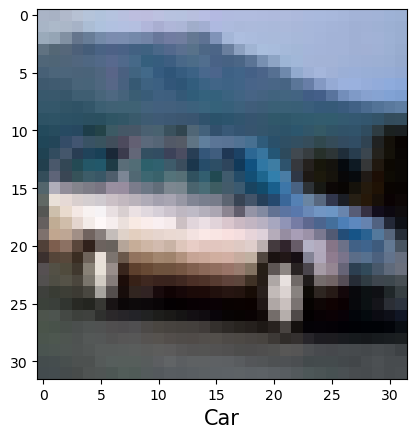

In [11]:
plt.imshow(x_train_all[4])
plt.xlabel(LABEL_NAMES[y_train_all[4][0]], fontsize=15)
plt.show()

**Challenge:** Wriete a for loop to display the first 10 images from the `x_train_all` array in a row. Show the name of the label below the picture. Remove the ougly tick marks. *Hint* use Matplotlib.

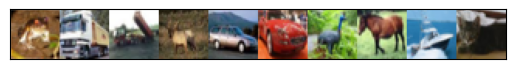

Frog   Truck   Truck   Deer   Car   Car   Bird   Horse   Ship   Cat   


In [12]:
# My solution
images = np.zeros((32, 320, 3))
img_labels = ''
for i in range(10):
    images[:, i*32:i*32+32, :] = x_train_all[i]/255
    img_labels += LABEL_NAMES[y_train_all[i][0]] + '   '
plt.imshow(images)
plt.tick_params(axis='both', bottom=False, left=False, labelbottom=False, labelleft=False)
plt.show()
print(img_labels)

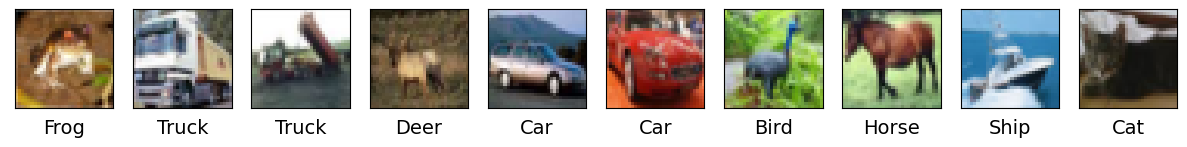

In [13]:
# Philipp's solution
plt.figure(figsize=(15, 5))

for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.yticks([])
    plt.xticks([])
    plt.imshow(x_train_all[i])
    plt.xlabel(LABEL_NAMES[y_train_all[i][0]], fontsize=14)

In [14]:
x_train_all[0].shape

(32, 32, 3)

In [15]:
nr_images, x, y, c = x_train_all.shape
print(f'images = {nr_images}\t| width = {x}\t| height = {y}\t| channels = {c}')

images = 50000	| width = 32	| height = 32	| channels = 3


In [16]:
x_test.shape

(10000, 32, 32, 3)

# Preprocess Data

In [17]:
type(x_train_all[0][0][0][0])

numpy.uint8

In [18]:
x_train_all, x_test = x_train_all / 255.0, x_test / 255.0

In [19]:
type(x_train_all[0][0][0][0])

numpy.float64

In [20]:
x_train_all = x_train_all.reshape(x_train_all.shape[0], TOTAL_INPUTS)

In [21]:
x_train_all.shape

(50000, 3072)

In [22]:
x_test = x_test.reshape(len(x_test), TOTAL_INPUTS)

In [23]:
print(f'Shape of x_test is {x_test.shape}')

Shape of x_test is (10000, 3072)


## Create Validation Dataset

In [24]:
x_val = x_train_all[:VALIDATION_SIZE]
y_val = y_train_all[:VALIDATION_SIZE]
x_val.shape

(10000, 3072)

**Challenge:** Create two numpy arrays `x_train` and `y_train` that have the shape (40000, 3072) and (40000, 1) respectively. They need to contain the last 40000 values from `x_train_all` and `y_train_all` respectively.

In [25]:
x_train = x_train_all[VALIDATION_SIZE:]
y_train = y_train_all[VALIDATION_SIZE:]
x_train.shape

(40000, 3072)

## Create a small dataset (for illustration)

In [26]:
x_train_xs = x_train[:SMALL_TRAIN_SIZE]
y_train_xs = y_train[:SMALL_TRAIN_SIZE]

# Define the Neural Network using Keras

In [ ]:
model_1 = Sequential([
    Dense(units=128, input_dim=TOTAL_INPUTS, activation='relu', name='m1_hidden1'),
    Dense(units=64, activation='relu', name='m1_hidden2'),
    Dense(units=16, activation='relu', name='m1_hidden3'),
    Dense(units=10, activation='softmax', name='m1_output')
])

model_1.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [27]:
model_2 = Sequential()
model_2.add(Dropout(0.2, seed=42, input_shape=(TOTAL_INPUTS,)))
model_2.add(Dense(128, activation='relu', name='m2_hidden1'))
model_2.add(Dense(64, activation='relu', name='m2_hidden2'))
model_2.add(Dense(16, activation='relu', name='m2_hidden3'))
model_2.add(Dense(10, activation='softmax', name='m2_output'))

model_2.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

2022-12-20 14:10:00.732960: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-20 14:10:00.746787: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


**Challenge:** Create a third model, `model_3` that has two dropout layers. The second dropout layer should be added after the first hidden layer and have a dropout rate of 25%.

In [ ]:
model_3 = Sequential()
model_3.add(Dropout(0.2, seed=42, input_shape=(TOTAL_INPUTS,)))
model_3.add(Dense(128, activation='relu', name='m3_hidden1'))
model_3.add(Dropout(0.25, seed=42))
model_3.add(Dense(64, activation='relu', name='m3_hidden2'))
model_3.add(Dense(16, activation='relu', name='m3_hidden3'))
model_3.add(Dense(10, activation='softmax', name='m3_output'))

model_3.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
type(model_1)

In [ ]:
model_1.summary()

In [ ]:
32*32*3*128 + 128 + (128*64 + 64) + (64*16 + 16) + (16*10 + 10)

# Tensorboard (visualising learning)

In [28]:
def get_tensorboard(model_name):
    
    folder_name = f'{model_name} at {strftime("%H %M")}'
    dir_paths = os.path.join(LOG_DIR, folder_name)

    try:
        os.makedirs(dir_paths)
    except OSError as err:
        print(err.strerror)
    else:
        print('Successfully created directory.')
        
    return TensorBoard(log_dir=dir_paths)

# Fit the Model

In [29]:
samples_per_batch = 1000

In [ ]:
# %%time
# nr_epochs = 150
# model_1.fit(x_train_xs, y_train_xs, batch_size= samples_per_batch, epochs=nr_epochs,
#             callbacks=[get_tensorboard("Model_1")], verbose=0, validation_data=(x_val, y_val))

In [ ]:
%%time
nr_epochs = 100
model_1.fit(x_train, y_train, batch_size= samples_per_batch, epochs=nr_epochs,
            callbacks=[get_tensorboard("Model_1 XL")], verbose=0, validation_data=(x_val, y_val))

In [30]:
%%time
nr_epochs = 100
model_2.fit(x_train, y_train, batch_size= samples_per_batch, epochs=nr_epochs,
            callbacks=[get_tensorboard("Model_2 XL")], verbose=0, validation_data=(x_val, y_val))

Successfully created directory.
CPU times: user 36min 1s, sys: 40min 22s, total: 1h 16min 23s
Wall time: 5min 27s


In [ ]:
%%time
nr_epochs = 100
model_3.fit(x_train, y_train, batch_size= samples_per_batch, epochs=nr_epochs,
            callbacks=[get_tensorboard("Model_3 XL")], verbose=0, validation_data=(x_val, y_val))

# Predictions on Individual Images

In [31]:
x_val[0].shape

(3072,)

In [32]:
test = np.expand_dims(x_val[0], axis=0)
test.shape

(1, 3072)

In [33]:
np.set_printoptions(precision=3)

In [34]:
model_2.predict(test)

1/1 [==============================] - 0s 148ms/step


array([[1.034e-02, 1.528e-03, 2.312e-01, 1.096e-01, 1.544e-01, 9.906e-02,
        3.138e-01, 7.888e-02, 2.844e-04, 9.078e-04]], dtype=float32)

In [35]:
model_2.predict(x_val).shape

313/313 [==============================] - 11s 34ms/step


(10000, 10)

In [36]:
np.argmax(model_2.predict(test), axis=1)

1/1 [==============================] - 0s 21ms/step


array([6])

In [37]:
y_val[0]

array([6], dtype=uint8)

**Challenge:** Write a for loop wwhere you print out the actual value and the predicted value for the first 10 images in the avlitadion dataset.

In [38]:
for i in range(10):
    test = np.expand_dims(x_val[i], axis=0)
    pred = np.argmax(model_2.predict(test, verbose=0), axis=1)[0]
    true = y_val[i][0]
    print(f'Actual value = {true} | Predicted value = {pred}')

Actual value = 6 | Predicted value = 6
Actual value = 9 | Predicted value = 1
Actual value = 9 | Predicted value = 9
Actual value = 4 | Predicted value = 6
Actual value = 1 | Predicted value = 1
Actual value = 1 | Predicted value = 7
Actual value = 2 | Predicted value = 2
Actual value = 7 | Predicted value = 7
Actual value = 8 | Predicted value = 8
Actual value = 3 | Predicted value = 2


# Evaluation

In [39]:
model_2.metrics_names

['loss', 'accuracy']

In [40]:
test_loss, test_accuracy = model_2.evaluate(x_test, y_test)
print(f'Test loss is {test_loss:0.3} and test accuracy is {test_accuracy:0.1%}.')

313/313 [==============================] - 8s 26ms/step - loss: 1.4436 - accuracy: 0.4886
Test loss is 1.44 and test accuracy is 48.9%.


## Confusion matrix

In [41]:
predictions = np.argmax(model_2.predict(x_test), axis=1)
conf_matrix = confusion_matrix(y_true=y_test, y_pred=predictions)

313/313 [==============================] - 4s 14ms/step


In [42]:
conf_matrix.shape

(10, 10)

In [43]:
nr_rows = conf_matrix.shape[0]
nr_cols = conf_matrix.shape[1]

In [44]:
conf_matrix.max()

704

In [45]:
conf_matrix.min()

4

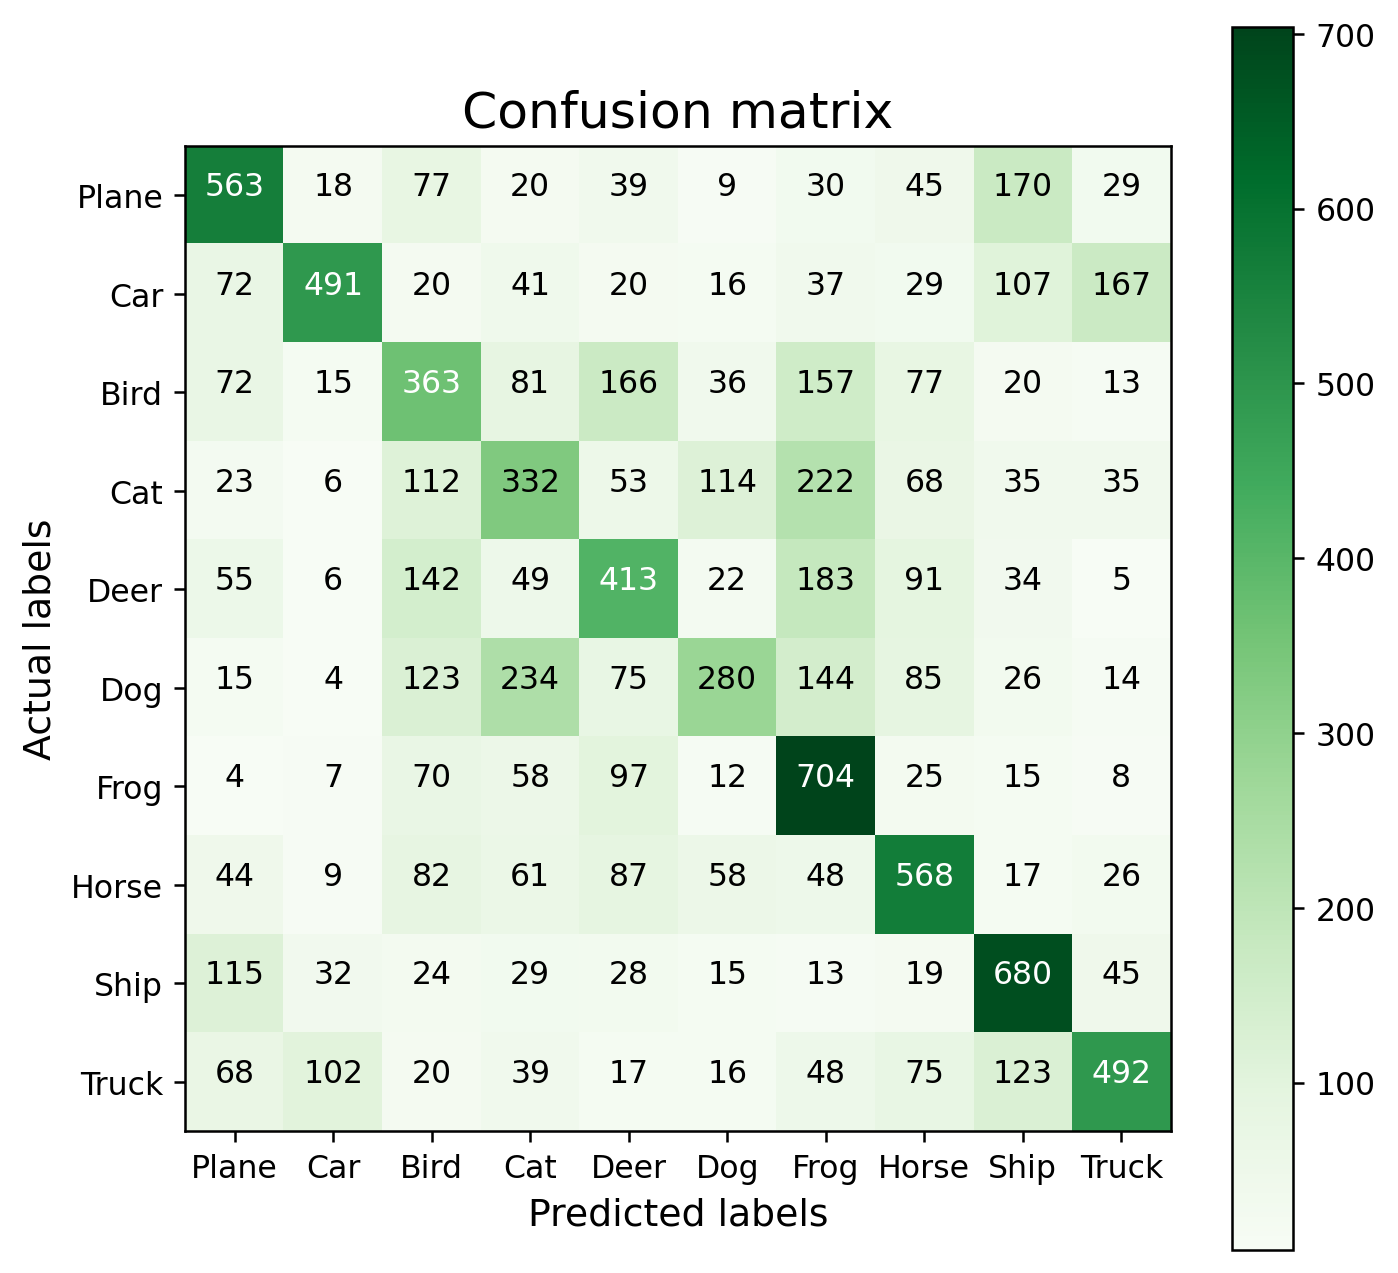

In [61]:
plt.figure(figsize=(7,7), dpi=227)
plt.imshow(conf_matrix, cmap=plt.cm.Greens)

plt.title('Confusion matrix', fontsize=16)
plt.ylabel('Actual labels', fontsize=12)
plt.xlabel('Predicted labels', fontsize=12)

tick_marks = np.arange(NR_CLASSES)
plt.yticks(tick_marks, LABEL_NAMES)
plt.xticks(tick_marks, LABEL_NAMES)

plt.colorbar()

for i, j in itertools.product(range(nr_rows), range(nr_cols)):
    plt.text(j, i, conf_matrix[i, j], horizontalalignment='center',
             color='white' if conf_matrix[i, j] > conf_matrix.max()/2 else 'black')

plt.show()

**Challenge:** What do the numbers down the diagonal represent? What do the numbers (excluding the number in the diagoanl) in a single row represent? Try to identify the false positives, false negatives, and the true poistives in the confusion matrix.

From sklearn documentation 👉 Confusion matrix whose i-th row and j-th column entry indicates the number of samples with true label being i-th class and predicted label being j-th class.

Numbers in the diagonal: Coincidence between actual and predicted label. These are true positives.

Numbers down the diagonal are false positives for one particular category.

The sum of the rows excludig the diagonal gives the false negatives for a perticular category.

In [62]:
# True positives
np.diag(conf_matrix)

array([563, 491, 363, 332, 413, 280, 704, 568, 680, 492])

In [64]:
recall = np.diag(conf_matrix) / np.sum(conf_matrix, axis=1)
recall

array([0.563, 0.491, 0.363, 0.332, 0.413, 0.28 , 0.704, 0.568, 0.68 ,
       0.492])

In [65]:
precision = np.diag(conf_matrix) / np.sum(conf_matrix, axis=0)
precision

array([0.546, 0.712, 0.351, 0.352, 0.415, 0.484, 0.444, 0.525, 0.554,
       0.59 ])

In [66]:
avg_recall = np.mean(recall)
print(f'Model 2 recall score is {avg_recall:.2%}')

Model 2 recall score is 48.86%


**Challenge:** Calculate the average presision for the model a a whole. Print this out. Then calculate the f-score for the model as a whole.

In [69]:
avg_precision = np.mean(precision)
print(f'Model 2 precision score is {avg_precision:.2%}')

Model 2 precision score is 49.73%


In [71]:
f_score = 2*avg_precision*avg_recall/(avg_precision+avg_recall)
print(f'Model 2 f-score is {f_score:.2%}')

Model 2 f-score is 49.29%
